In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [155]:
df = pd.read_csv('data/policy_list.csv')
#df = df.drop(columns = ['ID',  'ISO3',  'ISO2', 'SOURCE_QUALITY', 'SOURCE_TYPE',
#                        'INTERNAL_GOVT_SOURCE', 'AIRLINE_SOURCE', 'INSURANCE_SOURCE',
#                        'GOVT_SOCIAL_MED_SOURCE', 'EXT_GOVT_SOURCE', 'INTERNAL_MEDIA_SOURCE',
#                        'EXT_MEDIA_SOURCE', 'OTHER_SOURCE', 'END_SOURCE', 'OLD_ID'])
df.START_DATE = pd.to_datetime(df.START_DATE, format = "%m_%d_%y", errors = 'coerce')
df.END_DATE = pd.to_datetime(df.END_DATE, format = "%m_%d_%y", errors = 'coerce')
#fixing wrong dates
df.loc[878, ['END_DATE']] = pd.to_datetime('2021-01-10')
df.loc[69, ['END_DATE']] = pd.to_datetime('2020-04-28')
df.loc[421, ['START_DATE']] = pd.to_datetime('2020-08-17')
df.loc[595, ['END_DATE']] = pd.to_datetime('2021-01-04')
df.loc[918, ['END_DATE']] = pd.to_datetime('2021-02-01')
df.loc[1196, ['END_DATE']] = pd.to_datetime('2021-09-21')

df = df.sort_values('START_DATE')
#When variables [AIR, LAND, SEA] are equals to 0, the variables {}_TYPE and {}_TARGET are NAN
#But it isn't missing values, they should be replaced with "None"
for col in ['AIR', 'LAND', 'SEA']:
    pass
    #df.loc[df[col] == 0, col+'_TYPE'] = "None"
    #df.loc[df[col] == 0, 'TARGETS_'+col] = "None"
    
#The same problem occurs with [CITIZEN, HISTORY, REFUGEE] and {}_LIST
for col in ['CITIZEN', 'HISTORY_BAN', 'REFUGEE', 'VISA_BAN', 'COUNTRY_EXCEP', 'CITIZEN_EXCEP']:
    pass
    #df.loc[df[col] == 0, col+'_LIST'] = "None"
    
#df.loc[df['VISA_BAN'] == 0, 'VISA_BAN_TYPE'] = "None"


print(df.columns)

Index(['ID', 'COUNTRY_NAME', 'ISO3', 'ISO2', 'POLICY_TYPE', 'POLICY_SUBTYPE',
       'START_DATE', 'END_DATE', 'AIR', 'AIR_TYPE', 'TARGETS_AIR', 'LAND',
       'LAND_TYPE', 'TARGETS_LAND', 'SEA', 'SEA_TYPE', 'TARGETS_SEA',
       'CITIZEN', 'CITIZEN_LIST', 'HISTORY_BAN', 'HISTORY_BAN_LIST', 'REFUGEE',
       'REFUGEE_LIST', 'VISA_BAN', 'VISA_BAN_TYPE', 'VISA_BAN_LIST',
       'CITIZEN_EXCEP', 'CITIZEN_EXCEP_LIST', 'COUNTRY_EXCEP',
       'COUNTRY_EXCEP_LIST', 'WORK_EXCEP', 'SOURCE_QUALITY', 'SOURCE_TYPE',
       'INTERNAL_GOVT_SOURCE', 'AIRLINE_SOURCE', 'INSURANCE_SOURCE',
       'GOVT_SOCIAL_MED_SOURCE', 'EXT_GOVT_SOURCE', 'INTERNAL_MEDIA_SOURCE',
       'EXT_MEDIA_SOURCE', 'OTHER_SOURCE', 'END_SOURCE', 'COMMENTS', 'OLD_ID'],
      dtype='object')


In [176]:
df.isna().mean()

ID                        0.000000
COUNTRY_NAME              0.000000
ISO3                      0.000000
ISO2                      0.005181
POLICY_TYPE               0.000000
POLICY_SUBTYPE            0.000000
START_DATE                0.005922
END_DATE                  0.206514
AIR                       0.000000
AIR_TYPE                  0.623242
TARGETS_AIR               0.709845
LAND                      0.000000
LAND_TYPE                 0.867506
TARGETS_LAND              0.905996
SEA                       0.000000
SEA_TYPE                  0.906736
TARGETS_SEA               0.922280
CITIZEN                   0.000000
CITIZEN_LIST              0.918579
HISTORY_BAN               0.000000
HISTORY_BAN_LIST          0.867506
REFUGEE                   0.000000
REFUGEE_LIST              0.998520
VISA_BAN                  0.000000
VISA_BAN_TYPE             0.954108
VISA_BAN_LIST             0.983716
CITIZEN_EXCEP             0.000000
CITIZEN_EXCEP_LIST        0.758697
COUNTRY_EXCEP       

In [184]:
df.loc[140, :]

ID                                                                     KG02
COUNTRY_NAME                                                     Kyrgyzstan
ISO3                                                                    KGZ
ISO2                                                                     KG
POLICY_TYPE                                                        COMPLETE
POLICY_SUBTYPE                                                CITIZEN_EXCEP
START_DATE                                              2020-03-17 00:00:00
END_DATE                                                2020-12-09 00:00:00
AIR                                                                       0
AIR_TYPE                                                                NaN
TARGETS_AIR                                                             NaN
LAND                                                                      0
LAND_TYPE                                                               NaN
TARGETS_LAND

In [86]:
print(f"Unique countries that created policies: {len(df.COUNTRY_NAME.unique())}")
print(f"Initial start date: {df.START_DATE.min()}")
print(f"Last end date: {df.END_DATE.max()}")
print("\nType of policys:")
print(df.POLICY_TYPE.value_counts())
print("\nClosures:")
print(f"Total of air closures: {df[df.AIR == 1].shape[0]}/{df.shape[0]}")
print(f"Total of land closures: {df[df.LAND == 1].shape[0]}/{df.shape[0]}")
print(f"Total of sea closures: {df[df.SEA == 1].shape[0]}/{df.shape[0]}")
print("\nPartial closures params:")
for col in ['CITIZEN', 'HISTORY_BAN', 'REFUGEE', 'VISA_BAN']:
    print(f"{col.lower()}: {df[df[col] == 1].shape[0]}/{df.shape[0]}")
print("\nComplete closure exceptions:")    
for col in ['CITIZEN_EXCEP', 'COUNTRY_EXCEP', 'WORK_EXCEP']:
    print(f"{col.lower()}: {df[df[col] == 1].shape[0]}/{df.shape[0]}")

Unique countries that created policies: 247
Initial start date: 2020-01-22 00:00:00
Last end date: 2021-10-01 00:00:00

Type of policys:
PARTIAL                965
COMPLETE               378
NOPOLICYIMPLEMENTED      8
Name: POLICY_TYPE, dtype: int64

Closures:
Total of air closures: 509/1351
Total of land closures: 179/1351
Total of sea closures: 126/1351

Partial closures params:
citizen: 110/1351
history_ban: 179/1351
refugee: 3/1351
visa_ban: 62/1351

Complete closure exceptions:
citizen_excep: 326/1351
country_excep: 99/1351
work_excep: 92/1351


<ipython-input-153-12d0a287d77c>:11: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(axis='x', nbins=4)


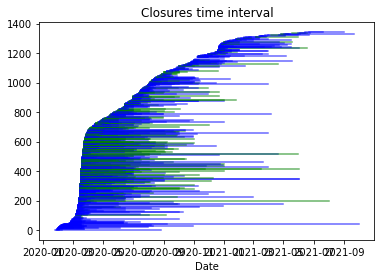

In [153]:
df = df.sort_values('START_DATE')
for i in range(df.shape[0]):
    if not (pd.isnull(df.END_DATE.iloc[i]) or pd.isnull(df.START_DATE.iloc[i])):
        if df.POLICY_TYPE.iloc[i] == 'PARTIAL':
            plt.plot([df.START_DATE.iloc[i], df.END_DATE.iloc[i]], [i, i], color = 'blue', alpha = 0.6)
        elif df.POLICY_TYPE.iloc[i] == 'COMPLETE':
            plt.plot([df.START_DATE.iloc[i], df.END_DATE.iloc[i]], [i, i], color = 'green', alpha = 0.6)
            
plt.title("Closures time interval")
plt.xlabel("Date")
plt.show()